In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

In [2]:
x_data = np.linspace(0.0,10.0,1000000)

In [3]:
noise = np.random.randn(len(x_data))

In [6]:
#y=mx+b

y_true = (0.5 * x_data) + 5+noise

In [8]:
x_df = pd.DataFrame(data=x_data, columns=['X Data'])

In [9]:
y_df = pd.DataFrame(data=y_true, columns=['Y'])

In [12]:
my_data = pd.concat([x_df,y_df],axis=1)

<AxesSubplot:xlabel='X Data', ylabel='Y'>

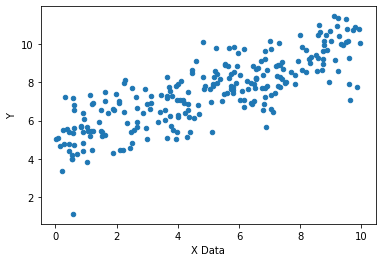

In [15]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')

In [18]:
batch_size = 8
m = tf.Variable(0.47994818)
b = tf.Variable(0.89323697)

In [19]:
np.random.randn(2)

array([-0.6292275 ,  1.80122047])

In [20]:
xph = tf.placeholder(tf.float32,[batch_size])
yph = tf.placeholder(tf.float32,[batch_size])

In [21]:
y_model = m * xph + b

In [22]:
error = tf.reduce_sum(tf.square(yph-y_model)) #loss function

In [27]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)
init = tf.global_variables_initializer()

In [32]:
with tf.Session() as sess:
    sess.run(init)
    
    batches = 10000 #10000 batches sent 
    
    for i in range(batches):
        rand_ind = np.random.randint(len(x_data),size=batch_size)
        
        feed = {xph:x_data[rand_ind],yph: y_true[rand_ind]}
        
        sess.run(train,feed_dict=feed)
    model_m, model_b = sess.run([m,b])

In [33]:
y_hat  = x_data * model_m + model_b

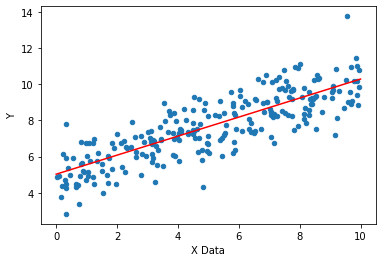

In [34]:
my_data.sample(250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(x_data, y_hat,'r')